In [4]:
!pip install xgboost


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

In [5]:
data=pd.read_csv('train.csv')
data

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
0,0,100.0,0.841611,10.000000,4.800000,20.612526,11.088100,2.766000,1.732000,0.860000,0.496070,0.91457,6.0
1,1,100.0,7.558488,10.000000,4.800000,20.298893,12.040830,2.755000,1.631000,0.910000,0.492719,0.71760,6.5
2,2,76.0,8.885992,15.600000,5.600000,33.739258,12.086300,2.828000,1.788000,0.864000,0.481478,1.50633,2.5
3,3,100.0,8.795296,10.000000,4.800000,20.213349,10.948500,2.648000,1.626000,0.936000,0.489272,0.78937,6.0
4,4,116.0,9.577996,11.600000,4.800000,24.988133,11.824480,2.766000,1.682000,0.896000,0.492736,1.86481,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10402,10402,128.0,7.558488,12.000000,4.000000,26.385218,11.330440,2.644000,1.631000,0.892000,0.496070,1.79607,4.0
10403,10403,30.0,1.743160,10.000000,5.333333,20.766935,14.163933,3.090000,1.556667,0.866667,0.480390,0.81480,5.0
10404,10404,196.0,30.920000,24.500000,5.500000,53.490297,10.074300,2.295000,1.545000,1.120000,0.469715,2.11540,1.8
10405,10405,38.0,1.553160,12.666667,4.666667,26.621687,11.290033,2.743333,1.756667,0.980000,0.486507,0.77755,6.0


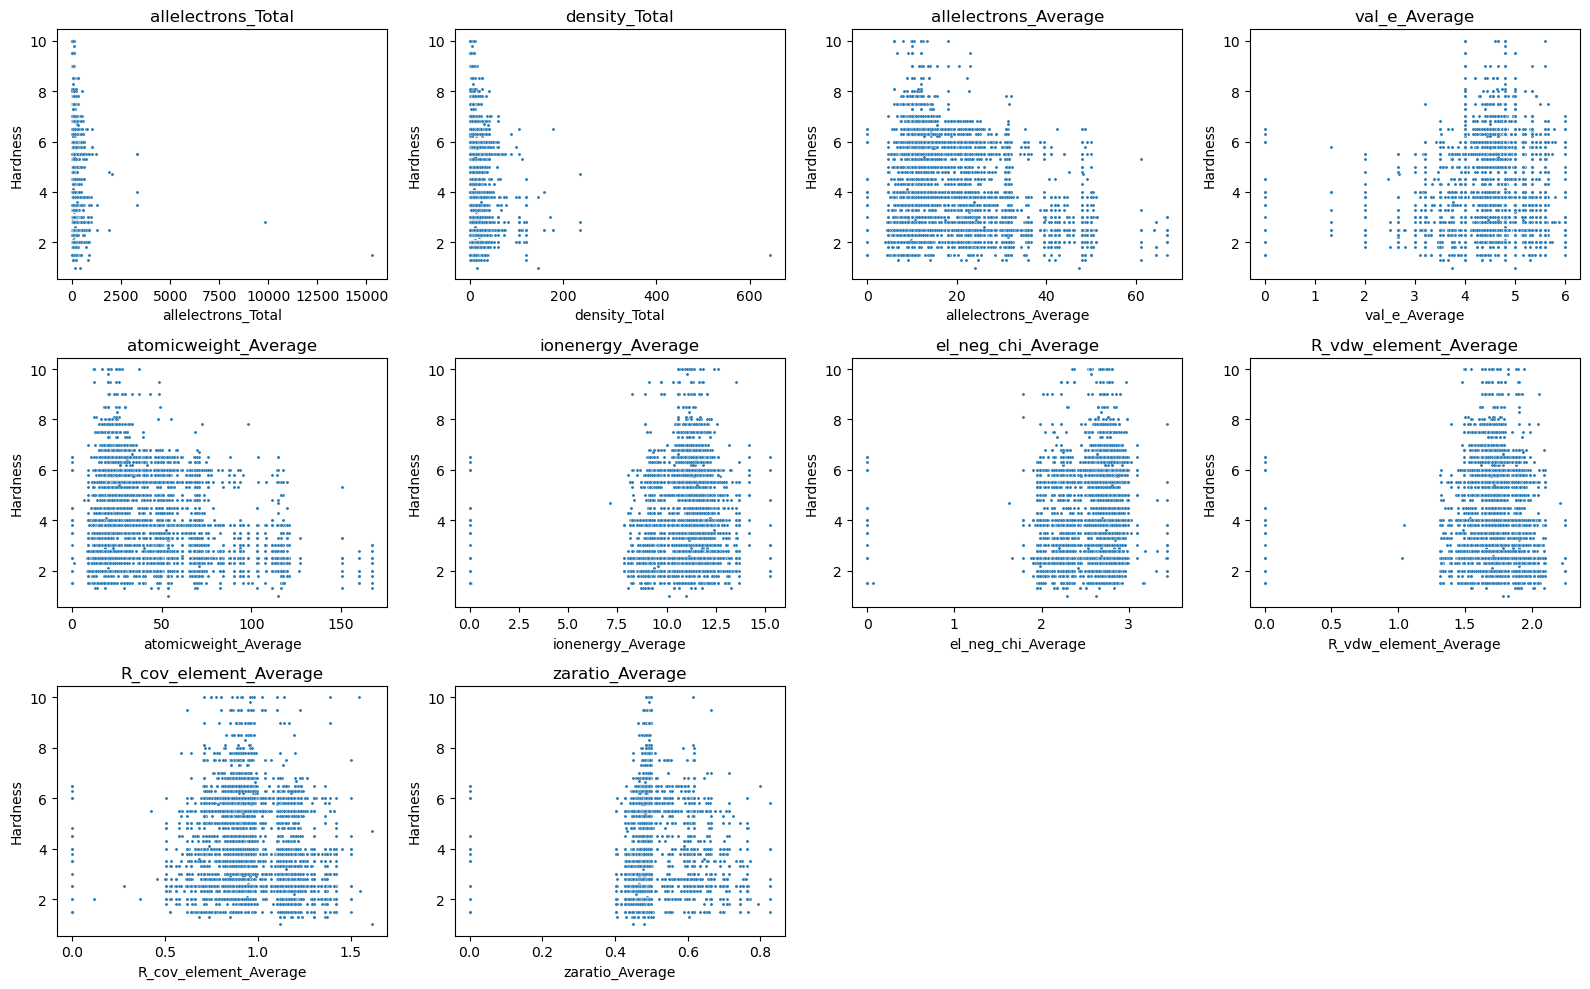

In [6]:
# fig, axs = plt.subplots(3,4)
fig = plt.figure(figsize = (16, 10))
i = 1
for label in data.drop(columns=['id']).columns[:-2]:
    plt.subplot(3, 4, i)
    sns.scatterplot(data, x=label, y="Hardness", s=5)
    plt.title(label)
    i += 1
plt.tight_layout()
plt.show()

In [5]:
X=data
X=X.drop(['Hardness','id'],axis=1)

In [6]:
y=data['Hardness']

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10407 entries, 0 to 10406
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   allelectrons_Total     10407 non-null  float64
 1   density_Total          10407 non-null  float64
 2   allelectrons_Average   10407 non-null  float64
 3   val_e_Average          10407 non-null  float64
 4   atomicweight_Average   10407 non-null  float64
 5   ionenergy_Average      10407 non-null  float64
 6   el_neg_chi_Average     10407 non-null  float64
 7   R_vdw_element_Average  10407 non-null  float64
 8   R_cov_element_Average  10407 non-null  float64
 9   zaratio_Average        10407 non-null  float64
 10  density_Average        10407 non-null  float64
dtypes: float64(11)
memory usage: 894.5 KB


In [8]:
X.describe()

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
count,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000
mean,128.053516,14.491342,17.033222,4.546789,37.507703,10.938308,2.607662,1.731330,0.944132,0.493349,2.132984
std,224.123776,15.972877,10.468734,0.690864,26.012313,1.408276,0.334906,0.192481,0.180017,0.063080,1.936656
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,68.000000,7.558488,10.000000,4.000000,20.298893,10.590660,2.530000,1.672500,0.864000,0.476196,0.814800
50%,100.000000,10.650000,12.600000,4.714286,26.203827,11.202760,2.706000,1.732727,0.915556,0.488550,1.351550
75%,131.000000,16.676996,22.000000,4.800000,48.719500,11.670725,2.805000,1.800000,0.981667,0.496070,2.741550
max,15300.000000,643.093804,67.000000,6.000000,167.400000,15.245810,3.443000,2.250000,1.615840,0.825990,10.970000


In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=0)
#X_train=X
#y_train=y
#X_test=pd.read_csv('test.csv')
#ids=X_test.id
#X_test=X_test.drop('id',axis=1)

In [10]:
X_test

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
3284,146.0,14.091992,22.000000,4.000000,48.719500,11.260300,2.810000,1.750000,0.945000,0.492799,2.40189
10008,86.0,8.841328,14.333333,5.000000,30.550687,11.654067,2.860000,1.732000,0.893333,0.487833,1.20466
3069,42.0,7.442831,10.600000,4.800000,22.988947,12.027800,2.660000,1.542000,0.703000,0.589660,1.11572
8044,14.0,0.580056,4.666667,1.333333,8.773227,11.614333,1.903333,1.310000,0.680000,0.825990,0.52225
9678,93.0,20.807992,19.333333,3.666667,39.987667,9.350333,2.146667,1.913333,1.213333,0.480390,2.94712
...,...,...,...,...,...,...,...,...,...,...,...
7924,106.0,11.354411,35.333333,3.666667,88.011920,9.350333,2.140000,1.943333,1.180000,0.451590,1.56776
8049,30.0,2.701748,7.500000,4.000000,14.996860,11.705100,2.745000,1.545000,0.710000,0.614430,0.73067
8311,56.0,4.093996,10.000000,4.800000,22.206043,10.939875,2.835500,1.687000,0.892000,0.496592,0.85728
8979,42.0,4.243996,9.200000,4.800000,18.439538,11.798860,2.805000,1.656000,0.848000,0.492719,0.67544


In [11]:
#for col in X.columns:
 #   sns.histplot(X[col],kde=True)
  #  plt.title(col)
   # plt.show()

<Axes: >

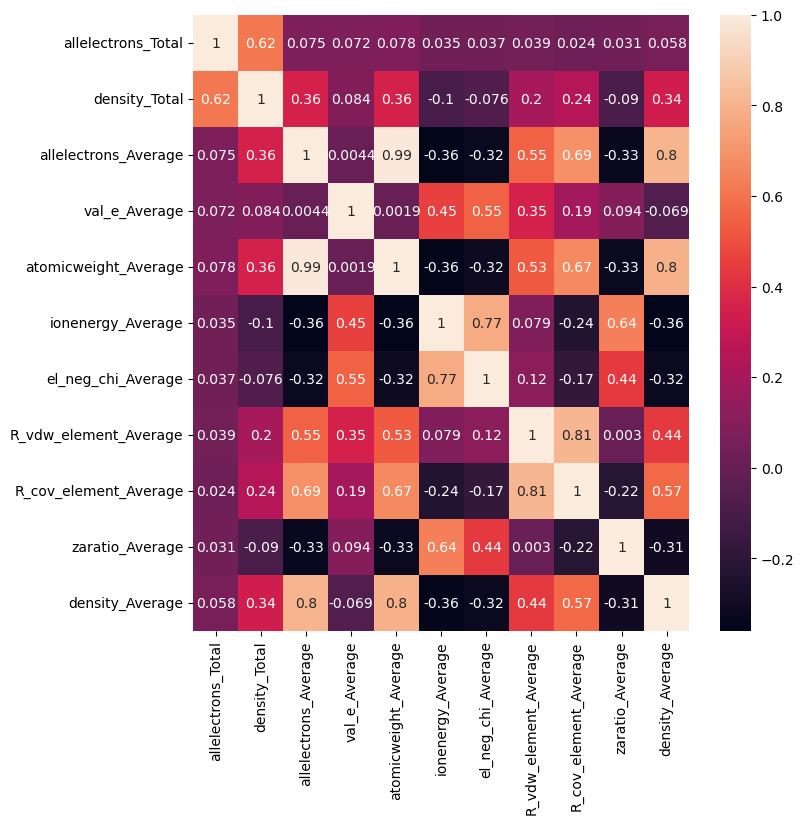

In [12]:
corr=X.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr,annot=True)

<Axes: xlabel='allelectrons_Average', ylabel='atomicweight_Average'>

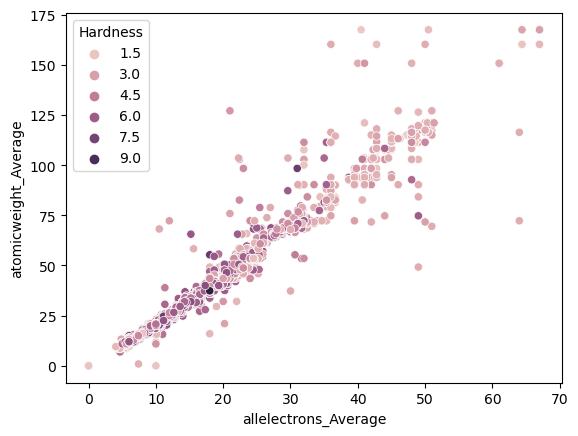

In [13]:
sns.scatterplot(x=data.allelectrons_Average,y=data.atomicweight_Average,hue=data.Hardness)

In [14]:
allec_atomweig_train=(X_train.allelectrons_Average + X_train.atomicweight_Average)/2
allec_atomweig_test=(X_test.allelectrons_Average + X_test.atomicweight_Average)/2
X_train=X_train.drop(['allelectrons_Average','atomicweight_Average'],axis=1)
X_test=X_test.drop(['allelectrons_Average','atomicweight_Average'],axis=1)
X_train['allec_atomweig']=allec_atomweig_train
X_test['allec_atomweig']=allec_atomweig_test

<Axes: xlabel='R_cov_element_Average', ylabel='R_vdw_element_Average'>

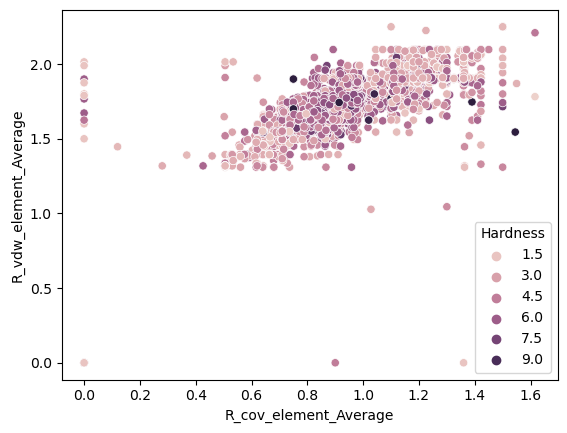

In [15]:
sns.scatterplot(x=X.R_cov_element_Average,y=X.R_vdw_element_Average,hue=data.Hardness)

In [16]:
X.R_cov_element_Average.describe()

count    10407.000000
mean         0.944132
std          0.180017
min          0.000000
25%          0.864000
50%          0.915556
75%          0.981667
max          1.615840
Name: R_cov_element_Average, dtype: float64

In [17]:
X.R_vdw_element_Average.describe()

count    10407.000000
mean         1.731330
std          0.192481
min          0.000000
25%          1.672500
50%          1.732727
75%          1.800000
max          2.250000
Name: R_vdw_element_Average, dtype: float64

In [18]:
R_cov_vdw_train=X_train.R_cov_element_Average*X_train.R_vdw_element_Average
R_cov_vdw_test=X_test.R_cov_element_Average*X_test.R_vdw_element_Average
X_train=X_train.drop(['R_cov_element_Average','R_vdw_element_Average'],axis=1)
X_test=X_test.drop(['R_cov_element_Average','R_vdw_element_Average'],axis=1)
X_train['R_cov_vdw']=R_cov_vdw_train
X_test['R_cov_vdw']=R_cov_vdw_test

In [19]:
X_train

,allelectrons_Total,density_Total,val_e_Average,ionenergy_Average,el_neg_chi_Average,zaratio_Average,density_Average,allec_atomweig,R_cov_vdw
2783,74.0,6.283996,4.400000,11.144460,2.828000,0.482036,1.15072,23.187318,1.295616
3279,120.0,8.862328,5.166667,10.776008,2.826667,0.491876,0.81244,15.092698,1.570750
9770,114.0,8.892328,5.000000,10.789170,2.750000,0.489795,0.74322,23.279500,1.667925
6477,80.0,5.621480,4.160000,12.046624,2.713600,0.616443,0.60442,11.806550,1.105699
4004,196.0,30.920000,5.500000,10.074300,2.295000,0.469715,4.52755,38.995149,2.044000
...,...,...,...,...,...,...,...,...,...
9225,122.0,13.590000,4.800000,10.789170,2.774000,0.475954,2.26855,19.182363,1.648878
4859,58.0,8.962995,4.000000,11.381680,2.545000,0.477665,4.93700,28.784028,2.006000
3264,100.0,5.230979,4.666667,10.296858,2.495000,0.495120,0.58973,15.092698,1.683292
9845,176.0,14.734151,3.200000,12.040830,2.738000,0.695602,0.85358,9.976584,0.937797


count    10407.000000
mean       128.053516
std        224.123776
min          0.000000
25%         68.000000
50%        100.000000
75%        131.000000
max      15300.000000
Name: allelectrons_Total, dtype: float64 
 

count    10407.000000
mean        14.491342
std         15.972877
min          0.000000
25%          7.558488
50%         10.650000
75%         16.676996
max        643.093804
Name: density_Total, dtype: float64


<Axes: xlabel='allelectrons_Total', ylabel='density_Total'>

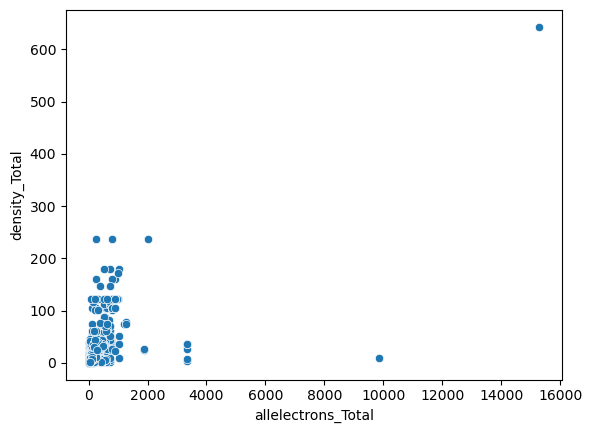

In [20]:
print(X.allelectrons_Total.describe(),'\n \n')
print(X.density_Total.describe())

sns.scatterplot(x=X.allelectrons_Total,y=X.density_Total)


# Feature Selection

In [21]:
mif_score=mutual_info_regression(X_train,y_train)
mif_df=pd.DataFrame()


In [22]:
mif_df['Score']=mif_score
mif_df.index=X_train.columns
mif_df

,Score
allelectrons_Total,0.268448
density_Total,0.326661
val_e_Average,0.273749
ionenergy_Average,0.450219
el_neg_chi_Average,0.394182
zaratio_Average,0.469643
density_Average,0.187106
allec_atomweig,0.471199
R_cov_vdw,0.413377


In [23]:
X_train=X_train.drop('density_Average',axis=1)
X_test=X_test.drop('density_Average',axis=1)

In [24]:
#standard_scaler=RobustScaler()
#standard_scaler.fit_transform(X_train)
#standard_scaler.transform(X_test)

In [25]:
standard_scaler=StandardScaler()
new_X_train=standard_scaler.fit_transform(X_train)
new_X_test=standard_scaler.transform(X_test)

# Model Training

In [26]:
#error_list=[]
#for i in range(1,20):
#    rf = RandomForestRegressor(min_samples_split=i+1,criterion='squared_error')
#    model_rf=rf.fit(X_train,y_train)
#    pred=model_rf.predict(X_test)
#    acc=mean_squared_error(y_test,pred)
#    error_list.append(acc)
#acc

In [27]:
print(pd.DataFrame(error_list))

NameError: name 'error_list' is not defined

In [ ]:
#error_list=[]
#for i in range(1,20):
#    dt=DecisionTreeRegressor(min_samples_split=i+5)
#    model_dt=dt.fit(X_train,y_train)
#    pred=model_dt.predict(X_test)
#    acc=mean_squared_error(y_test,pred)
#    error_list.append(acc)


In [28]:
error_list

NameError: name 'error_list' is not defined

In [29]:
rf = RandomForestRegressor(min_samples_split=16,criterion='squared_error')
model_rf=rf.fit(X_train,y_train)
pred=model_rf.predict(X_test)
acc=mean_squared_error(y_test,pred)
acc

1.4690198155402674

In [30]:
acc=mean_squared_error(y_test,pred)
acc

1.4690198155402674

In [31]:
pred

array([4.7710058 , 5.48718807, 4.3258823 , ..., 4.97202939, 5.16058244,
       5.01945137])

In [32]:
pred_df=pd.DataFrame()
pred_df.index=ids
pred_df['Hardness']=pred
pred_df


NameError: name 'ids' is not defined

In [ ]:
pred_df.to_csv('submission.csv')

In [ ]:
X_train

In [ ]:
X_test